<a href="https://colab.research.google.com/github/claytonelbelTAMU/IPEC-638-Introduction-to-Data-Science/blob/main/hw2/HW2_P1_Scikitlearn_Clayton_Elbel_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis for Diabetes Data Set
###  ICPE 638 - Spring 2025

[Haoyu Niu](https://orcid.org/0000-0002-7052-8877), Texas A&M University.
Updated: Jan. 29, 2025.

HW Grade Points: 8/20

- Name: Clayton Elbel
- UIN: 328003781
- GitHub or Google colab link:

### **Dataset**

The dataset contains ten baseline variables. Age, sex, body mass index, average blood pressure, and six blood serum measurements for each diabetes patient (n = 442), as well as the response of interest, a quantitative measure of disease progression one year after the baseline.

##### Data Set Characteristics:

* Number of Instances 442

* Number of Attributes
The first 10 columns are numeric predictive values.

* Target
Column 11 is a quantitative measure of disease progression one year after the baseline

* Attribute Information
  
 1. Age in years
 2. Sex
 3. bmi, Body Mass Index
 4. bp, average blood pressure
 5. s1 tc, T-Cells (a type of white blood cells)
 6. s2 ldl, low-density lipoproteins
 7. s3 hdl, high-density lipoproteins
 8. s4 tch, thyroid stimulating hormone
 9. s5 ltg, lamotrigine
 10. s6 glu, blood sugar level

### **Problem**

For your submission, in addition to showing the statistics of the dataset, you will need to include the following:

1. The attributes pair with the strongest correlation among all possible combinations.

2. Using the same attribute pair from 1, select one attribute as a response and the other as a predictor, create a linear regression model for that pair of attributes, and plot the bestfit line.

## Download and Process Dataset

Please don't change this section!

You can directly use the dataframe `df` in your code.

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
diabetes_data = load_diabetes()
print(diabetes_data["DESCR"])
df=pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
df

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


### Note for Haoyu Niu

For the data processing part of this assignment, I imported additional libraries needed for visualization and modeling (numpy, matplotlib, seaborn, scipy.stats, and sklearn components). I then examined the basic statistics of the diabetes dataset using df.describe() to understand the distribution of each feature and checked for missing values with df.isnull().sum().

I felt these code cells were more appropriate in the *Download and Process Dataset* section than in the *Exploratory Data Analysis* section.

### Additional Libraries Needed

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set style for better visualizations
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

### Basic Statistics

In [10]:
# Basic statistics
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


### Note for Clayton on Data Preprocessing

The statistics above reveal that this dataset has been preprocessed with standardization. All features have been mean-centered (means very close to zero) and scaled to have similar standard deviations (all approximately 0.048).

This preprocessing is confirmed in the dataset description: "Each of these 10 feature variables have been mean **centered** and scaled by the standard deviation times the square root of n_samples".

**Why Do We Do This?**

Working with standardized data is beneficial for analysis because:
1. It puts all variables on a comparable scale
2. It improves the numerical stability of our modeling algorithms
3. It makes correlation analysis more directly interpretable

### Check for Missing Values

In [5]:
# Check for missing values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


The dataset has no missing values, so we can proceed with exploratory data analysis without data cleaning

## Exploratory Data Analysis

### Histograms

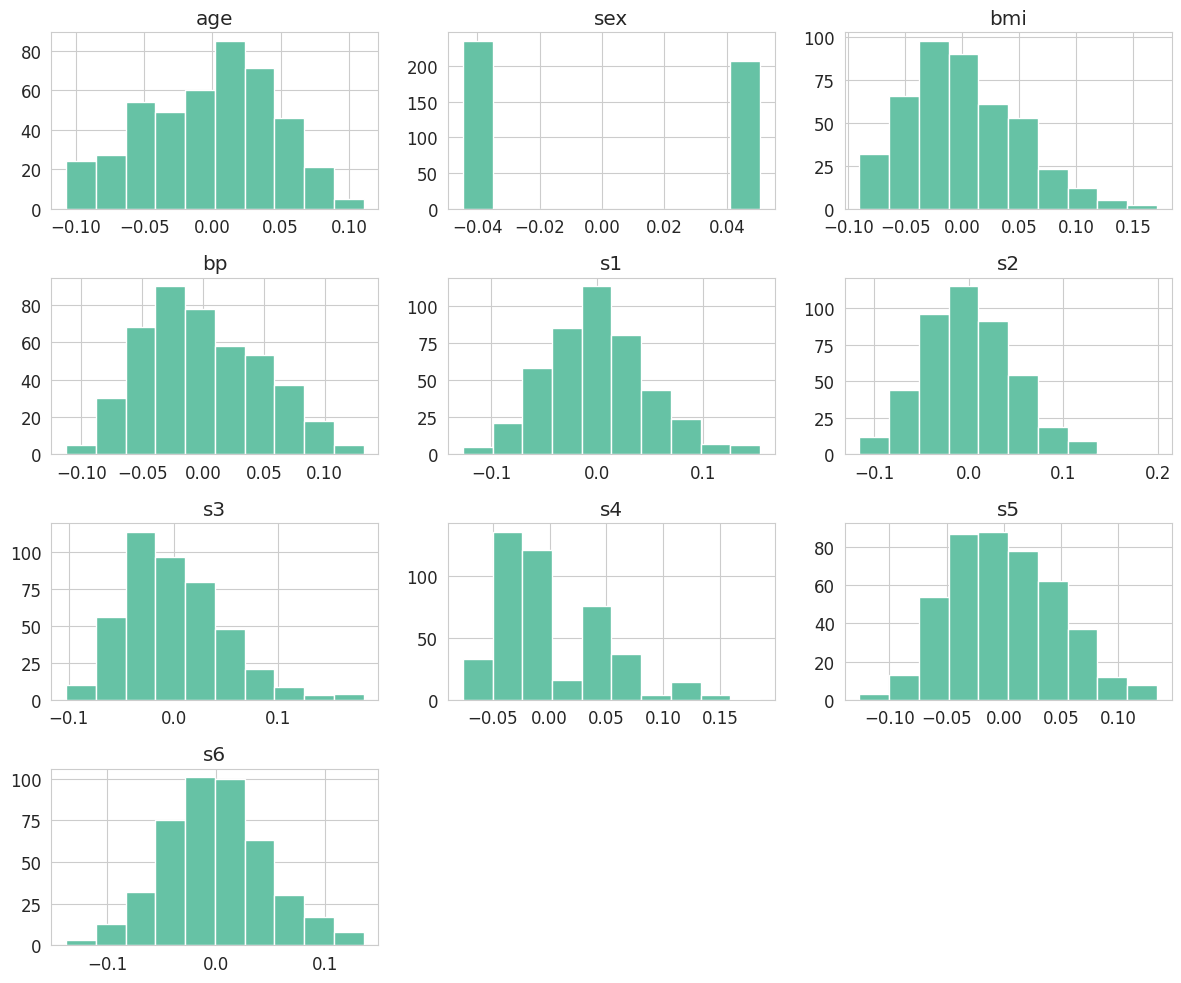

In [8]:
# Display histograms for all features
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

### Correlation Analysis



In [12]:
# Calculate correlation matrix
corr_matrix = df.corr().abs()

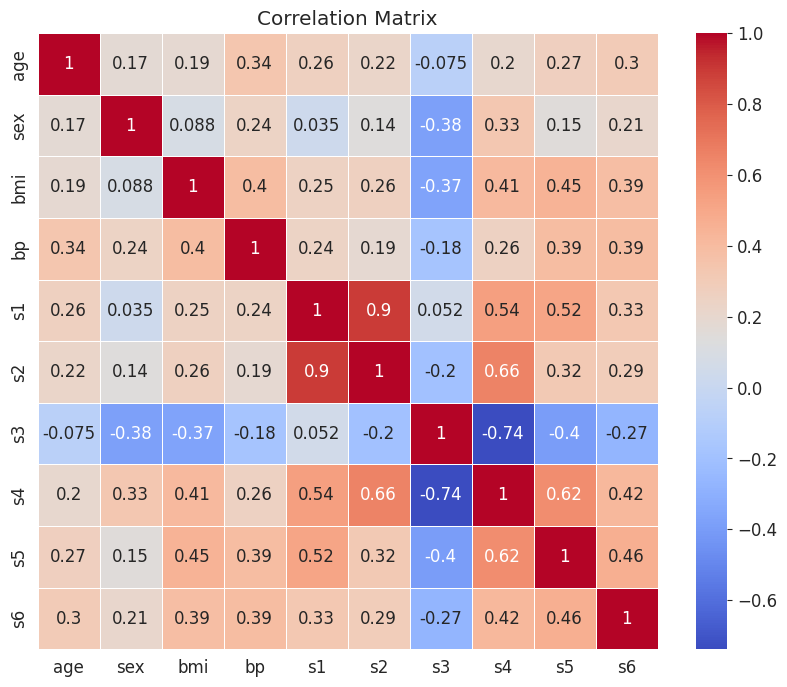

In [13]:
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Correlation** **Matrix** **Analysis**

From visual inspection, several moderate correlations stand out in the matrix, particularly between certain blood serum measurements. Most correlations appear to be in the low to moderate range, suggesting complex interrelationships between these physiological measurements rather than simple one-to-one relationships.

In [14]:
# Find attribute pair with the strongest correlation
# Remove self-correlations by setting diagonal to 0
np.fill_diagonal(corr_matrix.values, 0)

In [15]:
# Find the maximum correlation value
max_corr = corr_matrix.max().max()

In [16]:
# Find the attributes with this correlation
max_corr_attrs = []
for col in corr_matrix.columns:
    for idx in corr_matrix.index:
        if corr_matrix.loc[idx, col] == max_corr:
            max_corr_attrs = [idx, col]
            break

In [17]:
print(f"The strongest correlation ({max_corr:.4f}) is between {max_corr_attrs[0]} and {max_corr_attrs[1]}")

The strongest correlation (0.8967) is between s1 and s2


**Strongest Correlation Pair**

The analysis identifies that the strongest correlation (0.8967) is between s1 (total serum cholesterol) and s2 (low-density lipoproteins, or LDL). This strong positive correlation suggests that as total cholesterol increases, LDL levels tend to increase as well.

From a medical perspective, this relationship makes sense because LDL is a major component of total cholesterol. This strong correlation aligns with existing medical literature which often associates these two factors in diabetes patients. The strength of this relationship suggests that one variable might be useful in predicting the other.

## Linear Regression Model

### **Selection for Regression Model**

I've selected s1 (total serum cholesterol) as the predictor variable and s2 (LDL) as the response variable for my regression model based on their strong correlation. This selection makes logical sense because total cholesterol includes LDL as one of its components, so the former naturally influences the latter.

Using the strongest correlated pair provides the best opportunity to demonstrate a clear linear relationship. In the diabetes context, understanding how total cholesterol relates to LDL levels could help monitor or predict changes in patients' health and adjusting treatment approaches accordingly.

### **Linear** **Regression** **Analysis**

In [19]:
# Set predictor (X) and response (y) variables
# Note: Reshape X to meet scikit-learn's requirement for 2D array format
# Reshape X to a 2D array (n_samples, 1) as scikit-learn requires features in 2D
# format, even when using just one feature for prediction

X = df[max_corr_attrs[0]].values.reshape(-1, 1)  # Independent variable (predictor)
y = df[max_corr_attrs[1]].values  # Dependent variable (response)

In [20]:
# Create and fit the linear regression model
# This calculates the optimal coefficient and intercept
model = LinearRegression()
model.fit(X, y)  # Training the model on our data

LinearRegression()

In [21]:
# Generate predictions using our model
y_pred = model.predict(X)

In [22]:
# Calculate R-squared (coefficient of determination)
# R² measures how well the model explains the variance in the data
# Higher values (closer to 1) indicate better fit
r2 = r2_score(y, y_pred)

In [23]:
# Print model results
print(f'Coefficient: {model.coef_[0]:.4f}')  # Slope of the regression line
print(f'Intercept: {model.intercept_:.4f}')  # Y-intercept of the regression line
print(f'R-squared: {r2:.4f}')  # Proportion of variance explained by the model (R^2)

Coefficient: 0.8967
Intercept: 0.0000
R-squared: 0.8040


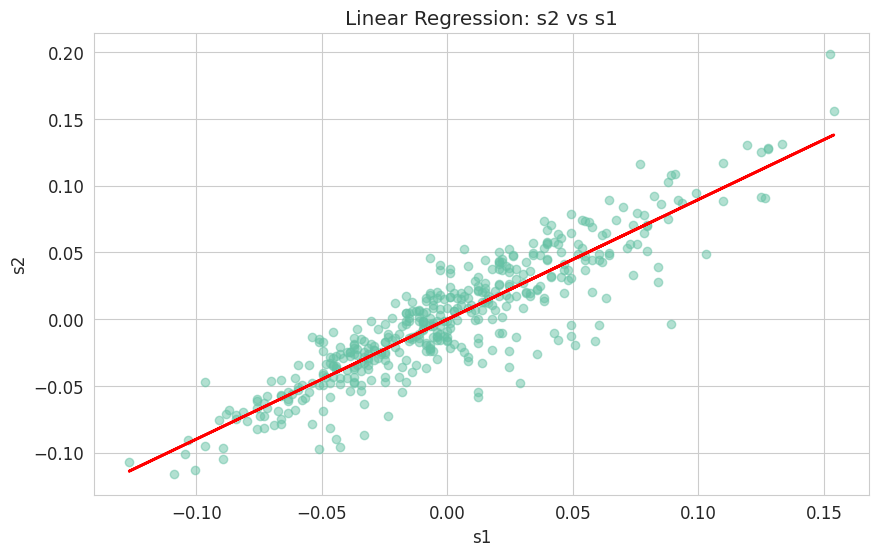

In [24]:
# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)  # Original data points with transparency
plt.plot(X, y_pred, color='red', linewidth=2)  # Regression line
plt.xlabel(max_corr_attrs[0])
plt.ylabel(max_corr_attrs[1])
plt.title(f'Linear Regression: {max_corr_attrs[1]} vs {max_corr_attrs[0]}')
plt.grid(True)
plt.show()

**Summary** **of** **Analysis**

Based on the strongest correlation pair identified earlier, I created a linear regression model using s1 (total serum cholesterol) as the predictor and s2 (LDL cholesterol) as the response variable. The scatter plot with the best-fit line visually confirms the strong positive linear relationship between these variables.

The regression model produced the following results:
- Coefficient (slope): 0.8967 - This indicates that for each unit increase in total cholesterol (s1), LDL cholesterol (s2) increases by approximately 0.8967 units
- Intercept: 0.0000 - The intercept being zero reflects the standardized nature of our data, where both variables are centered around zero
- R-squared: 0.8040 - This means that approximately 80.4% of the variance in LDL levels can be explained by total cholesterol levels, indicating a strong predictive relationship

The near-zero intercept and the coefficient close to the correlation value (0.8967) validate our linear model. The high R-squared value suggests that total cholesterol is indeed a strong predictor of LDL cholesterol, which aligns with medical understanding since LDL is a major component of total cholesterol.

This regression model could potentially be useful for estimating a patient's LDL cholesterol level based on their total cholesterol measurement.